<a id="0"></a> <br>
 # Table of Contents  
1. [Data set: Analyze results from all matches: 1872-2022](#1)   
    1. [Remove rows with missing data](#1A) 
1. [Data set: Analyze results from FIFA team rankings: 1992-2022](#2) 
1. [Data set: Data for World Cup Groups: 2022](#3)
1. [Data set: Data from FiveThirtyEight Soccer Power Index(SPI): 2022](#4) 
    1. [Match country names across the 3 data frames](#4A)
1. [Final Data set: Merge the 3 data sets](#5) 
    1. [Merge team rankings with the SPI](#5A)
    1. [Merge match results with team rankings](#5B)
1. [Create the features](#6)     
    1. [Evaluation Metrics for Training set](#9)     
    1. [Evaluation Metrics for Validation set](#10)     
    1. [First Submission](#11) 
1. [Selecting Models](#12)       
    1. [Helper Functions to Try New Models](#13)      
    1. [Split to the Small Data for Evaluating Models Fast](#14)     
    1. [ML Models](#15)         
        1. [XGBoost](#16)             
            1. [Training](#17)

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.graph_objs as go
init_notebook_mode(connected = True)
import plotly.figure_factory as ff
import plotly.express as px
from IPython.display import Markdown as md
from IPython.display import display, Image, SVG, Math, YouTubeVideo
from datetime import datetime
import warnings

<a id="1"></a> 
# 1. Analyze results from all matches: 1872-2022

In [2]:
all_results_df =  pd.read_csv("../data/kaggle-1872-2022-results.csv")

all_results_df.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0.0,0.0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4.0,2.0,Friendly,London,England,False
2,1874-03-07,Scotland,England,2.0,1.0,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2.0,2.0,Friendly,London,England,False
4,1876-03-04,Scotland,England,3.0,0.0,Friendly,Glasgow,Scotland,False


In [3]:
all_results_df.tail()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
44055,2022-09-27,Norway,Serbia,0.0,2.0,UEFA Nations League,Oslo,Norway,False
44056,2022-09-27,Sweden,Slovenia,1.0,1.0,UEFA Nations League,Stockholm,Sweden,False
44057,2022-09-27,Kosovo,Cyprus,5.0,1.0,UEFA Nations League,Pristina,Kosovo,False
44058,2022-09-27,Greece,Northern Ireland,3.0,1.0,UEFA Nations League,Athens,Greece,False
44059,2022-09-30,Fiji,Solomon Islands,NaN,NaN,MSG Prime Minister's Cup,Luganville,Vanuatu,True


In [4]:
all_results_df.dtypes

date           object
home_team      object
away_team      object
home_score    float64
away_score    float64
tournament     object
city           object
country        object
neutral          bool
dtype: object

In [5]:
all_results_df.shape

(44060, 9)

In [6]:
all_results_df.isnull().sum()

date          0
home_team     0
away_team     0
home_score    1
away_score    1
tournament    0
city          0
country       0
neutral       0
dtype: int64

In [7]:
all_results_df[all_results_df.isnull().any(axis=1)]

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
44059,2022-09-30,Fiji,Solomon Islands,NaN,NaN,MSG Prime Minister's Cup,Luganville,Vanuatu,True


<a id="1A"></a> 
## A. Remove rows with missing data


In [8]:
all_results_df = all_results_df[all_results_df['home_score'].notna()]

In [9]:
all_results_df.isnull().sum()

date          0
home_team     0
away_team     0
home_score    0
away_score    0
tournament    0
city          0
country       0
neutral       0
dtype: int64

In [10]:
all_results_df.shape

(44059, 9)

In [11]:
all_results_df["date"] = pd.to_datetime(all_results_df["date"])

<a id="2"></a> 
# 2. Analyze results from FIFA team rankings: 1992-2022


Rankings scraped using python BeautifulSoup package from [FIFA Men's Rankings website](https://www.fifa.com/fifa-world-ranking/men?dateId=id13792).

In [12]:
team_rankings_df = pd.read_csv('../data/fifa-team-ranks-1992-2022.csv')
team_rankings_df.head()

,rank,country_full,country_abrv,total_points,previous_points,rank_change,confederation,rank_date
0,1,Germany,GER,57.0,0.0,0,UEFA,1992-12-31
1,96,Syria,SYR,11.0,0.0,0,AFC,1992-12-31
2,97,Burkina Faso,BFA,11.0,0.0,0,CAF,1992-12-31
3,99,Latvia,LVA,10.0,0.0,0,UEFA,1992-12-31
4,100,Burundi,BDI,10.0,0.0,0,CAF,1992-12-31


In [13]:
team_rankings_df.tail()

,rank,country_full,country_abrv,total_points,previous_points,rank_change,confederation,rank_date
63911,74,El Salvador,SLV,1330.51,1333.48,3,CONCACAF,2022-10-06
63912,75,Oman,OMA,1320.29,1323.03,0,AFC,2022-10-06
63913,76,Israel,ISR,1316.55,1316.35,0,UEFA,2022-10-06
63914,78,Georgia,GEO,1307.34,1296.46,-4,UEFA,2022-10-06
63915,211,San Marino,SMR,762.22,763.82,0,UEFA,2022-10-06


In [14]:
team_rankings_df.dtypes

rank                 int64
country_full        object
country_abrv        object
total_points       float64
previous_points    float64
rank_change          int64
confederation       object
rank_date           object
dtype: object

In [15]:
team_rankings_df.shape

(63916, 8)

In [16]:
team_rankings_df.isnull().sum()

rank               0
country_full       0
country_abrv       0
total_points       0
previous_points    0
rank_change        0
confederation      0
rank_date          0
dtype: int64

In [17]:
# we will use the date as the primary index to match the match results dataframe
team_rankings_df["rank_date"] = pd.to_datetime(team_rankings_df["rank_date"])

In [18]:
team_rankings_df.sort_values(by='rank_date').head(300)

,rank,country_full,country_abrv,total_points,previous_points,rank_change,confederation,rank_date
0,1,Germany,GER,57.0,0.0,0,UEFA,1992-12-31
95,74,Madagascar,MAD,18.0,0.0,0,CAF,1992-12-31
96,2,Italy,ITA,57.0,0.0,0,UEFA,1992-12-31
97,3,Brazil,BRA,56.0,0.0,0,CONMEBOL,1992-12-31
98,4,Sweden,SWE,56.0,0.0,0,UEFA,1992-12-31
...,...,...,...,...,...,...,...,...
199,151,Cuba,CUB,1.0,1.0,7,CONCACAF,1993-08-08
200,78,Syria,SYR,21.0,11.0,-18,AFC,1993-08-08
201,136,St. Lucia,LCA,4.0,6.0,18,CONCACAF,1993-08-08
202,115,Suriname,SUR,9.0,12.0,20,CONCACAF,1993-08-08


In [19]:
# eyeball the data
team_rankings_df.loc[team_rankings_df['country_full'] == 'Ghana']

,rank,country_full,country_abrv,total_points,previous_points,rank_change,confederation,rank_date
132,39,Ghana,GHA,34.00,0.00,0,CAF,1992-12-31
290,48,Ghana,GHA,34.00,34.00,9,CAF,1993-08-08
443,42,Ghana,GHA,37.00,34.00,-6,CAF,1993-09-23
472,40,Ghana,GHA,37.00,37.00,-2,CAF,1993-10-22
743,41,Ghana,GHA,37.00,37.00,1,CAF,1993-11-19
...,...,...,...,...,...,...,...,...
62875,61,Ghana,GHA,1381.45,1428.97,9,CAF,2022-02-10
63261,60,Ghana,GHA,1387.36,1381.45,-1,CAF,2022-03-31
63303,60,Ghana,GHA,1389.68,1387.36,0,CAF,2022-06-23
63687,60,Ghana,GHA,1393.47,1389.68,0,CAF,2022-08-25


<div class="alert alert-block alert-info"> <b>Note:</b> We will truncate the results data to start from 1992 so we have parity with the rankings data. </div>

In [20]:
team_rankings_df = team_rankings_df[(team_rankings_df["rank_date"] >= "1992-12-31")].reset_index(drop=True)

In [21]:
all_results_df = all_results_df[(all_results_df["date"] >= "1992-12-31")].reset_index(drop=True)
all_results_df.sort_values(by='date').head(300)

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1993-01-01,Ghana,Mali,1.0,1.0,Friendly,Libreville,Gabon,True
1,1993-01-02,Gabon,Burkina Faso,1.0,1.0,Friendly,Libreville,Gabon,False
2,1993-01-02,Kuwait,Lebanon,2.0,0.0,Friendly,Kuwait City,Kuwait,False
3,1993-01-03,Burkina Faso,Mali,1.0,0.0,Friendly,Libreville,Gabon,True
4,1993-01-03,Gabon,Ghana,2.0,3.0,Friendly,Libreville,Gabon,False
...,...,...,...,...,...,...,...,...,...
293,1993-05-07,Bangladesh,Sri Lanka,3.0,0.0,FIFA World Cup qualification,Dubai,United Arab Emirates,True
294,1993-05-07,Hong Kong,Bahrain,2.0,1.0,FIFA World Cup qualification,Beirut,Lebanon,True
297,1993-05-08,United States,Colombia,1.0,2.0,Friendly,Miami,United States,False
298,1993-05-09,Bahrain,South Korea,0.0,0.0,FIFA World Cup qualification,Beirut,Lebanon,True


In [22]:
#rank = rank.set_index(['rank_date']).groupby(['country_full'], group_keys=False).resample('D').first().fillna(method='ffill').reset_index()
#print(rank.shape)
#print(rank.dtypes)


In [23]:
#print(rank["country_full"].value_counts().sort_index().to_string())

<a id="3"></a> 
# 3. Data for World Cup Groups: 2022

In [24]:
world_cup_groups_df = pd.read_csv("../data/qatar-2022-groups.csv")

world_cup_groups_df.head()

,Group,Flag_Image,Team,Country_Name_Short,First match against,Second match against,Third match against
0,A,https://cloudinary.fifa.com/api/v3/picture/fla...,Qatar,QAT,Ecuador,Senegal,Netherlands
1,A,https://cloudinary.fifa.com/api/v3/picture/fla...,Ecuador,ECU,Qatar,Netherlands,Senegal
2,A,https://cloudinary.fifa.com/api/v3/picture/fla...,Senegal,SEN,Netherlands,Qatar,Ecuador
3,A,https://cloudinary.fifa.com/api/v3/picture/fla...,Netherlands,NED,Senegal,Ecuador,Qatar
4,B,https://cloudinary.fifa.com/api/v3/picture/fla...,England,ENG,Iran,USA,Wales


In [25]:
world_cup_groups_df.columns

Index(['Group', 'Flag_Image', 'Team', 'Country_Name_Short',
       'First match against', 'Second match against', 'Third match against'],
      dtype='object')

In [26]:
world_cup_groups_df.shape

(32, 7)

<a id="4"></a> 
# 4. Data set: Data from FiveThirtyEight Soccer Power Index(SPI): 2022

SPI data from [fivethirtheight.com website](https://fivethirtyeight.com/features/how-our-2022-world-cup-predictions-work/).

In [27]:
world_cup_spi_ratings_df = pd.read_csv("../data/fivethirtyeight-spi-index.csv")

world_cup_spi_ratings_df.head()

,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,sim_goal_diff,...,group_1,group_2,group_3,group_4,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp
0,2022-11-20 18:01:09 UTC,Brazil,G,93.54699,3.22213,0.29634,2.11717,0.59686,0.28597,4.46233,...,0.72109,0.19069,0.06774,0.02048,0.91178,0.68446,0.46037,0.32259,0.21689,2022-11-20 18:02:33 UTC
1,2022-11-20 18:01:09 UTC,Spain,E,89.50604,2.80203,0.38627,1.76786,0.69627,0.53587,2.89908,...,0.47131,0.33878,0.15173,0.03818,0.81009,0.56018,0.30576,0.19005,0.10784,2022-11-20 18:02:33 UTC
2,2022-11-20 18:01:09 UTC,France,D,87.70516,2.77362,0.47923,1.78685,0.73514,0.47801,2.97987,...,0.55701,0.27156,0.12059,0.05084,0.82857,0.54091,0.32990,0.17365,0.08682,2022-11-20 18:02:33 UTC
3,2022-11-20 18:01:09 UTC,Argentina,C,87.20776,2.62755,0.43170,1.83665,0.73167,0.43168,3.17458,...,0.59650,0.24498,0.11228,0.04624,0.84148,0.53055,0.32701,0.15601,0.08380,2022-11-20 18:02:33 UTC
4,2022-11-20 18:01:09 UTC,Portugal,H,87.77456,2.78861,0.48293,1.74272,0.74756,0.50972,2.80294,...,0.53465,0.27828,0.13315,0.05392,0.81293,0.46101,0.26312,0.15374,0.07754,2022-11-20 18:02:33 UTC


In [28]:
# all teams SPI ratings
all_spi_ratings_df = pd.read_csv("../data/fivethirtyeight_spi_global_rankings.csv")

all_spi_ratings_df.head()

,rank,name,confed,off,def,spi
0,1,Brazil,CONMEBOL,3.29,0.25,94.43
1,2,Spain,UEFA,2.82,0.36,90.10
2,3,Portugal,UEFA,2.93,0.44,89.68
3,4,France,UEFA,2.78,0.43,88.62
4,5,Germany,UEFA,3.21,0.65,88.55


<a id="4A"></a> 
## A. Match country names across the 4 data frames

In [29]:
np.array(sorted(world_cup_groups_df["Team"].unique()))

array(['Argentina', 'Australia', 'Belgium', 'Brazil', 'Cameroon',
       'Canada', 'Costa Rica', 'Croatia', 'Denmark', 'Ecuador', 'England',
       'France', 'Germany', 'Ghana', 'Iran', 'Japan', 'Korea Republic',
       'Mexico', 'Morocco', 'Netherlands', 'Poland', 'Portugal', 'Qatar',
       'Saudi Arabia', 'Senegal', 'Serbia', 'Spain', 'Switzerland',
       'Tunisia', 'USA', 'Uruguay', 'Wales'], dtype='<U14')

In [30]:
np.array(sorted(all_results_df["home_team"].unique()))

array(['Abkhazia', 'Afghanistan', 'Albania', 'Alderney', 'Algeria',
       'American Samoa', 'Andalusia', 'Andorra', 'Angola', 'Anguilla',
       'Antigua and Barbuda', 'Arameans Suryoye', 'Argentina', 'Armenia',
       'Artsakh', 'Aruba', 'Australia', 'Austria', 'Aymara', 'Azerbaijan',
       'Bahamas', 'Bahrain', 'Bangladesh', 'Barawa', 'Barbados',
       'Basque Country', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bermuda', 'Bhutan', 'Biafra', 'Bolivia', 'Bonaire',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'British Virgin Islands', 'Brittany', 'Brunei',
       'Brunei Darussalam', 'Bulgaria', 'Burkina Faso', 'Burundi',
       'Cambodia', 'Cameroon', 'Canada', 'Canary Islands', 'Cape Verde',
       'Cascadia', 'Catalonia', 'Cayman Islands',
       'Central African Republic', 'Chad', 'Chagos Islands', 'Chameria',
       'Chile', 'China PR', 'Colombia', 'Comoros', 'Congo',
       'Cook Islands', 'Corsica', 'Costa Rica', 'County of Nice',
       'Croatia', 'Cub

In [31]:
np.array(sorted(team_rankings_df["country_full"].unique()))

array(['Afghanistan', 'Albania', 'Algeria', 'American Samoa', 'Andorra',
       'Angola', 'Anguilla', 'Antigua and Barbuda', 'Argentina',
       'Armenia', 'Aruba', 'Australia', 'Austria', 'Azerbaijan',
       'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus',
       'Belgium', 'Belize', 'Benin', 'Bermuda', 'Bhutan', 'Bolivia',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'British Virgin Islands', 'Brunei Darussalam', 'Bulgaria',
       'Burkina Faso', 'Burundi', 'Cabo Verde', 'Cambodia', 'Cameroon',
       'Canada', 'Cape Verde Islands', 'Cayman Islands',
       'Central African Republic', 'Chad', 'Chile', 'China PR',
       'Chinese Taipei', 'Colombia', 'Comoros', 'Congo', 'Congo DR',
       'Cook Islands', 'Costa Rica', 'Croatia', 'Cuba', 'Curacao',
       'Curaçao', 'Cyprus', 'Czech Republic', 'Czechoslovakia',
       "Côte d'Ivoire", 'Denmark', 'Djibouti', 'Dominica',
       'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'England',
       'Equato

In [32]:
np.array(sorted(world_cup_spi_ratings_df["team"].unique()))

array(['Argentina', 'Australia', 'Belgium', 'Brazil', 'Cameroon',
       'Canada', 'Costa Rica', 'Croatia', 'Denmark', 'Ecuador', 'England',
       'France', 'Germany', 'Ghana', 'Iran', 'Japan', 'Mexico', 'Morocco',
       'Netherlands', 'Poland', 'Portugal', 'Qatar', 'Saudi Arabia',
       'Senegal', 'Serbia', 'South Korea', 'Spain', 'Switzerland',
       'Tunisia', 'USA', 'Uruguay', 'Wales'], dtype='<U12')

In [33]:
np.array(sorted(all_spi_ratings_df["name"].unique()))

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Anguilla', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Barbados', 'Basque Country', 'Belarus', 'Belgium',
       'Belize', 'Benin', 'Bermuda', 'Bhutan', 'Bolivia', 'Bonaire',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'British Virgin Islands', 'Brunei', 'Bulgaria', 'Burkina Faso',
       'Burundi', 'Cambodia', 'Cameroon', 'Canada', 'Cape Verde Islands',
       'Cayman Islands', 'Central African Republic', 'Chad', 'Chile',
       'China PR', 'Chinese Taipei', 'Colombia', 'Comoros', 'Congo',
       'Congo DR', 'Cook Islands', 'Costa Rica', 'Croatia', 'Cuba',
       'Curacao', 'Cyprus', 'Czech Republic', 'Denmark', 'Djibouti',
       'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'England', 'Equatorial Guinea', 'Eritrea',
       'Estonia', 'Ethiopia', 'Faroe Islands', 'F

In [34]:
# correct the county name for 2 countries
world_cup_groups_df = world_cup_groups_df.replace({"Korea Republic" : "South Korea", "USA": "United States"})
team_rankings_df = team_rankings_df.replace({"Korea Republic" : "South Korea", "USA": "United States", "IR Iran": "Iran"})
world_cup_spi_ratings_df = world_cup_spi_ratings_df.replace({"Korea Republic" : "South Korea", "USA": "United States"})
all_spi_ratings_df = all_spi_ratings_df.replace({"Korea Republic" : "South Korea", "USA": "United States"})

In [35]:
world_cup_groups_df = world_cup_groups_df.set_index('Team')
world_cup_groups_df.head()

,Group,Flag_Image,Country_Name_Short,First match against,Second match against,Third match against
Team,,,,,,
Qatar,A,https://cloudinary.fifa.com/api/v3/picture/fla...,QAT,Ecuador,Senegal,Netherlands
Ecuador,A,https://cloudinary.fifa.com/api/v3/picture/fla...,ECU,Qatar,Netherlands,Senegal
Senegal,A,https://cloudinary.fifa.com/api/v3/picture/fla...,SEN,Netherlands,Qatar,Ecuador
Netherlands,A,https://cloudinary.fifa.com/api/v3/picture/fla...,NED,Senegal,Ecuador,Qatar
England,B,https://cloudinary.fifa.com/api/v3/picture/fla...,ENG,Iran,United States,Wales


In [36]:
world_cup_groups_df.shape

(32, 6)

In [37]:
np.array(sorted(world_cup_spi_ratings_df["team"].unique()))

array(['Argentina', 'Australia', 'Belgium', 'Brazil', 'Cameroon',
       'Canada', 'Costa Rica', 'Croatia', 'Denmark', 'Ecuador', 'England',
       'France', 'Germany', 'Ghana', 'Iran', 'Japan', 'Mexico', 'Morocco',
       'Netherlands', 'Poland', 'Portugal', 'Qatar', 'Saudi Arabia',
       'Senegal', 'Serbia', 'South Korea', 'Spain', 'Switzerland',
       'Tunisia', 'United States', 'Uruguay', 'Wales'], dtype='<U13')

In [38]:
world_cup_spi_ratings_df.shape

(64, 22)

<a id="5"></a> 
# 5. Final Data set: Merge the 3 data sets

<a id="5A"></a> 
## A. Merge team rankings with the SPI

In [39]:
# # index SPI by country 
# spi_ratings_df = spi_ratings_df.set_index('team')
# spi_ratings_df.head()

In [40]:
# Remove duplicates so we only ove the SPI value for each of the world cup's 32 teams
world_cup_spi_ratings_df = world_cup_spi_ratings_df[['team','spi']].copy()

print(world_cup_spi_ratings_df.shape)

world_cup_spi_ratings_df = world_cup_spi_ratings_df.drop_duplicates(subset='team', keep="first")

print(world_cup_spi_ratings_df.shape)

#world_cup_spi_ratings_df = world_cup_spi_ratings_df.set_index('team')

world_cup_spi_ratings_df.head()

(64, 2)
(32, 2)


,team,spi
0,Brazil,93.54699
1,Spain,89.50604
2,France,87.70516
3,Argentina,87.20776
4,Portugal,87.77456


In [41]:
print(all_spi_ratings_df.shape)

(220, 6)


In [42]:
all_spi_ratings_df = all_spi_ratings_df[['name', 'spi']]
all_spi_ratings_df

,name,spi
0,Brazil,94.43
1,Spain,90.10
2,Portugal,89.68
3,France,88.62
4,Germany,88.55
...,...,...
215,Timor-Leste,0.69
216,Macau,0.66
217,Turks and Caicos Islands,0.47
218,Samoa,0.34


In [43]:
all_spi_ratings_df.rename(columns = {'name':'team'}, inplace = True)

In [44]:
# create final rankings for all global teams
final_spi_rankings_df = pd.merge(world_cup_spi_ratings_df, all_spi_ratings_df, how ='outer', on =['team','spi'])
final_spi_rankings_df

,team,spi
0,Brazil,93.54699
1,Spain,89.50604
2,France,87.70516
3,Argentina,87.20776
4,Portugal,87.77456
...,...,...
247,Timor-Leste,0.69000
248,Macau,0.66000
249,Turks and Caicos Islands,0.47000
250,Samoa,0.34000


In [45]:
# remove duplicates from the SPI data frame
final_spi_rankings_df = final_spi_rankings_df.drop_duplicates(['team'],keep='last')
final_spi_rankings_df.head()

,team,spi
32,Brazil,94.43
33,Spain,90.10
34,Portugal,89.68
35,France,88.62
36,Germany,88.55


In [46]:
final_spi_rankings_df.reset_index(drop=True, inplace=True)
final_spi_rankings_df.head()

,team,spi
0,Brazil,94.43
1,Spain,90.10
2,Portugal,89.68
3,France,88.62
4,Germany,88.55


In [47]:
# put the SPI value of each team into the rankings dataframe
print(team_rankings_df.columns)
print(team_rankings_df.shape)

team_rankings_df = pd.merge(team_rankings_df, final_spi_rankings_df, left_on=['country_full'], 
                           right_on=['team'], how='left')
print(team_rankings_df.columns)
print(team_rankings_df.shape)

Index(['rank', 'country_full', 'country_abrv', 'total_points',
       'previous_points', 'rank_change', 'confederation', 'rank_date'],
      dtype='object')
(63916, 8)
Index(['rank', 'country_full', 'country_abrv', 'total_points',
       'previous_points', 'rank_change', 'confederation', 'rank_date', 'team',
       'spi'],
      dtype='object')
(63916, 10)


In [48]:
team_rankings_df.duplicated(['rank_date','country_full']).tail()

63911    False
63912    False
63913    False
63914    False
63915    False
dtype: bool

In [49]:
team_rankings_df.head()

,rank,country_full,country_abrv,total_points,previous_points,rank_change,confederation,rank_date,team,spi
0,1,Germany,GER,57.0,0.0,0,UEFA,1992-12-31,Germany,88.55
1,96,Syria,SYR,11.0,0.0,0,AFC,1992-12-31,Syria,31.34
2,97,Burkina Faso,BFA,11.0,0.0,0,CAF,1992-12-31,Burkina Faso,54.38
3,99,Latvia,LVA,10.0,0.0,0,UEFA,1992-12-31,Latvia,34.31
4,100,Burundi,BDI,10.0,0.0,0,CAF,1992-12-31,Burundi,29.59


In [50]:
team_rankings_df.isnull().sum()

rank                  0
country_full          0
country_abrv          0
total_points          0
previous_points       0
rank_change           0
confederation         0
rank_date             0
team               2926
spi                2926
dtype: int64

Some countries will not have an SPI value

In [51]:
team_rankings_df[team_rankings_df.isna().any(axis=1)]

,rank,country_full,country_abrv,total_points,previous_points,rank_change,confederation,rank_date,team,spi
15,104,Eswatini,SWZ,10.00,0.00,0,CAF,1992-12-31,NaN,NaN
19,77,Korea DPR,PRK,16.00,0.00,0,AFC,1992-12-31,NaN,NaN
42,140,Brunei Darussalam,BRU,2.00,0.00,0,AFC,1992-12-31,NaN,NaN
82,27,Côte d'Ivoire,CIV,41.00,0.00,0,CAF,1992-12-31,NaN,NaN
84,29,Yugoslavia,YUG,39.00,0.00,0,UEFA,1992-12-31,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
63831,48,Côte d'Ivoire,CIV,1443.06,1435.91,-4,CAF,2022-10-06,NaN,NaN
63832,49,Republic of Ireland,IRL,1440.19,1442.48,2,UEFA,2022-10-06,NaN,NaN
63869,86,Curaçao,CUW,1278.64,1293.35,2,CONCACAF,2022-10-06,NaN,NaN
63878,95,Kyrgyz Republic,KGZ,1230.22,1232.91,0,AFC,2022-10-06,NaN,NaN


<a id="5B"></a> 
## B. Merge match results with team rankings

We are merging on date, but since the rankings date may not be same as the match date, we use merge_asof to get nearest date.

In [52]:
print(all_results_df.shape)
print(team_rankings_df.shape)
merged_df = pd.merge_asof(all_results_df, team_rankings_df, 
                           left_on="date", 
                           right_on="rank_date",  left_by="home_team", right_by="country_full")
print(merged_df.shape)
merged_df.head()
merged_df = pd.merge_asof(merged_df, team_rankings_df, 
                           left_on="date", 
                           right_on="rank_date",  left_by="away_team", right_by="country_full", suffixes=('_home', '_away'))
print(merged_df.shape)
merged_df.head()

(26361, 9)
(63916, 10)
(26361, 19)
(26361, 29)


,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,rank_home,...,rank_away,country_full_away,country_abrv_away,total_points_away,previous_points_away,rank_change_away,confederation_away,rank_date_away,team_away,spi_away
0,1993-01-01,Ghana,Mali,1.0,1.0,Friendly,Libreville,Gabon,True,39.0,...,69.0,Mali,MLI,22.0,0.0,0.0,CAF,1992-12-31,Mali,68.84
1,1993-01-02,Gabon,Burkina Faso,1.0,1.0,Friendly,Libreville,Gabon,False,55.0,...,97.0,Burkina Faso,BFA,11.0,0.0,0.0,CAF,1992-12-31,Burkina Faso,54.38
2,1993-01-02,Kuwait,Lebanon,2.0,0.0,Friendly,Kuwait City,Kuwait,False,71.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN
3,1993-01-03,Burkina Faso,Mali,1.0,0.0,Friendly,Libreville,Gabon,True,97.0,...,69.0,Mali,MLI,22.0,0.0,0.0,CAF,1992-12-31,Mali,68.84
4,1993-01-03,Gabon,Ghana,2.0,3.0,Friendly,Libreville,Gabon,False,55.0,...,39.0,Ghana,GHA,34.0,0.0,0.0,CAF,1992-12-31,Ghana,61.16


In [53]:
# print(all_results_df.shape)
# print(team_rankings_df.shape)
# df1 = all_results_df.merge(team_rankings_df, 
#                            left_on=['date', 'home_team'], 
#                            right_on=['rank_date', 'country_full'], how='left')
# print(df1.shape)
# df1 = df1.merge(team_rankings_df, 
#                 left_on=['date', 'away_team'], 
#                 right_on=['rank_date', 'country_full'], suffixes=('_home', '_away'), how='left') 
# print(df1.shape)
# df1.columns

In [54]:
pd.set_option('display.max_colwidth', None)
merged_df[merged_df.isna().any(axis=1)]

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,rank_home,...,rank_away,country_full_away,country_abrv_away,total_points_away,previous_points_away,rank_change_away,confederation_away,rank_date_away,team_away,spi_away
2,1993-01-02,Kuwait,Lebanon,2.0,0.0,Friendly,Kuwait City,Kuwait,False,71.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN
9,1993-01-10,DR Congo,Cameroon,1.0,2.0,FIFA World Cup qualification,Kinshasa,Zaïre,False,NaN,...,22.0,Cameroon,CMR,43.00,0.00,0.0,CAF,1992-12-31,Cameroon,63.58
16,1993-01-17,Botswana,Ivory Coast,0.0,0.0,FIFA World Cup qualification,Gaborone,Botswana,False,139.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN
20,1993-01-17,Namibia,Madagascar,0.0,1.0,FIFA World Cup qualification,Windhoek,Namibia,False,NaN,...,74.0,Madagascar,MAD,18.00,0.00,0.0,CAF,1992-12-31,Madagascar,35.93
21,1993-01-17,Eswatini,Cameroon,0.0,0.0,FIFA World Cup qualification,Mbabane,Eswatini,False,104.0,...,22.0,Cameroon,CMR,43.00,0.00,0.0,CAF,1992-12-31,Cameroon,63.58
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26325,2022-09-27,Brunei Darussalam,Laos,1.0,0.0,Friendly,Bandar Seri Begawan,Brunei,True,190.0,...,183.0,Laos,LAO,914.66,914.66,0.0,AFC,2022-08-25,Laos,1.43
26328,2022-09-27,DR Congo,Sierra Leone,3.0,0.0,Friendly,Casablanca,Morocco,True,NaN,...,113.0,Sierra Leone,SLE,1169.71,1168.21,0.0,CAF,2022-08-25,Sierra Leone,35.11
26335,2022-09-27,Indonesia,Curaçao,2.0,1.0,Friendly,Cibinong,Indonesia,False,155.0,...,84.0,Curaçao,CUW,1293.35,1293.35,0.0,CONCACAF,2022-08-25,NaN,NaN
26337,2022-09-27,Ivory Coast,Guinea,3.0,1.0,Friendly,Amiens,France,True,NaN,...,83.0,Guinea,GUI,1294.89,1294.89,0.0,CAF,2022-08-25,Guinea,43.98


In [55]:
merged_df.isna().sum()

date                       0
home_team                  0
away_team                  0
home_score                 0
away_score                 0
tournament                 0
city                       0
country                    0
neutral                    0
rank_home               2108
country_full_home       2108
country_abrv_home       2108
total_points_home       2108
previous_points_home    2108
rank_change_home        2108
confederation_home      2108
rank_date_home          2108
team_home               2418
spi_home                2418
rank_away               2481
country_full_away       2481
country_abrv_away       2481
total_points_away       2481
previous_points_away    2481
rank_change_away        2481
confederation_away      2481
rank_date_away          2481
team_away               2761
spi_away                2761
dtype: int64

In [56]:
merged_df = merged_df.dropna()
merged_df = merged_df.reset_index(drop=True)

In [57]:
merged_df.isna().sum()

date                    0
home_team               0
away_team               0
home_score              0
away_score              0
tournament              0
city                    0
country                 0
neutral                 0
rank_home               0
country_full_home       0
country_abrv_home       0
total_points_home       0
previous_points_home    0
rank_change_home        0
confederation_home      0
rank_date_home          0
team_home               0
spi_home                0
rank_away               0
country_full_away       0
country_abrv_away       0
total_points_away       0
previous_points_away    0
rank_change_away        0
confederation_away      0
rank_date_away          0
team_away               0
spi_away                0
dtype: int64

In [58]:
merged_df.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,rank_home,...,rank_away,country_full_away,country_abrv_away,total_points_away,previous_points_away,rank_change_away,confederation_away,rank_date_away,team_away,spi_away
0,1993-01-01,Ghana,Mali,1.0,1.0,Friendly,Libreville,Gabon,True,39.0,...,69.0,Mali,MLI,22.0,0.0,0.0,CAF,1992-12-31,Mali,68.84
1,1993-01-02,Gabon,Burkina Faso,1.0,1.0,Friendly,Libreville,Gabon,False,55.0,...,97.0,Burkina Faso,BFA,11.0,0.0,0.0,CAF,1992-12-31,Burkina Faso,54.38
2,1993-01-03,Burkina Faso,Mali,1.0,0.0,Friendly,Libreville,Gabon,True,97.0,...,69.0,Mali,MLI,22.0,0.0,0.0,CAF,1992-12-31,Mali,68.84
3,1993-01-03,Gabon,Ghana,2.0,3.0,Friendly,Libreville,Gabon,False,55.0,...,39.0,Ghana,GHA,34.0,0.0,0.0,CAF,1992-12-31,Ghana,61.16
4,1993-01-08,Uganda,Tanzania,3.0,1.0,Friendly,Kampala,Uganda,False,92.0,...,80.0,Tanzania,TAN,15.0,0.0,0.0,CAF,1992-12-31,Tanzania,35.70


In [59]:
merged_df.shape

(22118, 29)

<AxesSubplot:>

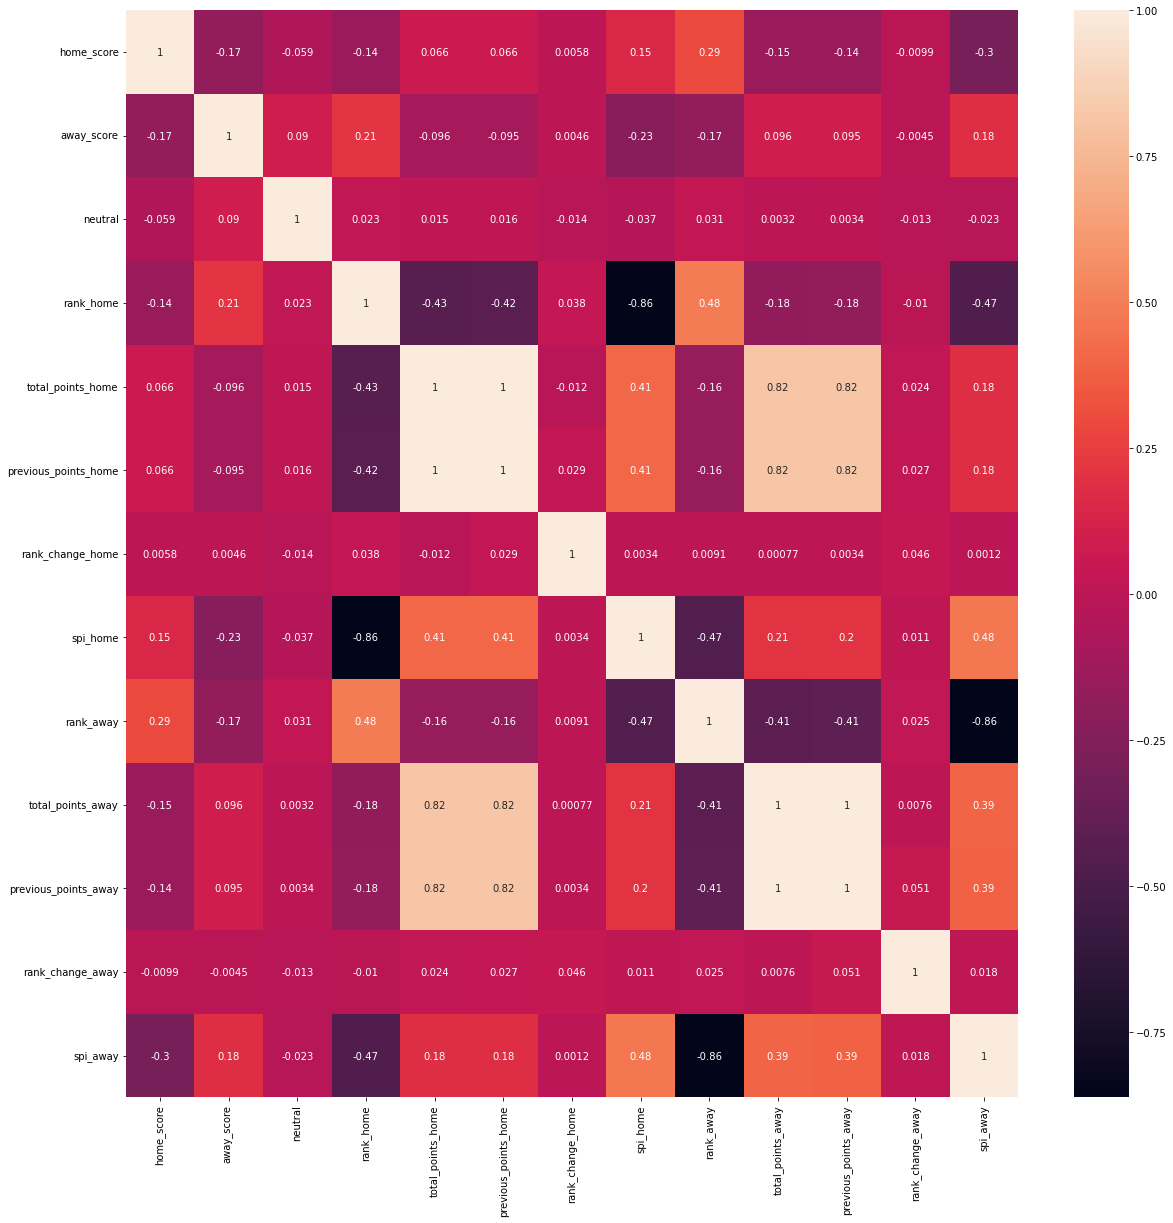

In [60]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 20)
corr1 = merged_df.corr()
corr1
sns.heatmap(corr1,annot=True)

SPI has a strong corelation with the teams score. Its stronger than just the rank of the team.

<a id="6"></a> 
# 6. Create the features

In [61]:
merged_df.columns

Index(['date', 'home_team', 'away_team', 'home_score', 'away_score',
       'tournament', 'city', 'country', 'neutral', 'rank_home',
       'country_full_home', 'country_abrv_home', 'total_points_home',
       'previous_points_home', 'rank_change_home', 'confederation_home',
       'rank_date_home', 'team_home', 'spi_home', 'rank_away',
       'country_full_away', 'country_abrv_away', 'total_points_away',
       'previous_points_away', 'rank_change_away', 'confederation_away',
       'rank_date_away', 'team_away', 'spi_away'],
      dtype='object')

In [62]:
merged_df['rank_difference'] = merged_df['rank_home'] - merged_df['rank_away']
merged_df['average_rank'] = (merged_df['rank_home'] + merged_df['rank_away'])/2
merged_df['point_difference'] = merged_df['total_points_home'] - merged_df['total_points_away']
merged_df['score_difference'] = merged_df['home_score'] - merged_df['away_score']
merged_df['winner'] = merged_df['score_difference'] > 0 
merged_df['is_competitive'] = merged_df['tournament'] != 'Friendly'

In [63]:
merged_df.columns

Index(['date', 'home_team', 'away_team', 'home_score', 'away_score',
       'tournament', 'city', 'country', 'neutral', 'rank_home',
       'country_full_home', 'country_abrv_home', 'total_points_home',
       'previous_points_home', 'rank_change_home', 'confederation_home',
       'rank_date_home', 'team_home', 'spi_home', 'rank_away',
       'country_full_away', 'country_abrv_away', 'total_points_away',
       'previous_points_away', 'rank_change_away', 'confederation_away',
       'rank_date_away', 'team_away', 'spi_away', 'rank_difference',
       'average_rank', 'point_difference', 'score_difference', 'winner',
       'is_competitive'],
      dtype='object')

In [64]:
# create dummies for world cup countries
merged_df['world_cup_team'] = merged_df['home_team'] * merged_df['home_team'].isin(world_cup_groups_df.index.tolist())
merged_df['world_cup_team'] = merged_df['world_cup_team'].replace({'':'Other'})
merged_df = merged_df.join(pd.get_dummies(merged_df['world_cup_team']))

In [65]:
merged_df.head(77)

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,rank_home,...,Saudi Arabia,Senegal,Serbia,South Korea,Spain,Switzerland,Tunisia,United States,Uruguay,Wales
0,1993-01-01,Ghana,Mali,1.0,1.0,Friendly,Libreville,Gabon,True,39.0,...,0,0,0,0,0,0,0,0,0,0
1,1993-01-02,Gabon,Burkina Faso,1.0,1.0,Friendly,Libreville,Gabon,False,55.0,...,0,0,0,0,0,0,0,0,0,0
2,1993-01-03,Burkina Faso,Mali,1.0,0.0,Friendly,Libreville,Gabon,True,97.0,...,0,0,0,0,0,0,0,0,0,0
3,1993-01-03,Gabon,Ghana,2.0,3.0,Friendly,Libreville,Gabon,False,55.0,...,0,0,0,0,0,0,0,0,0,0
4,1993-01-08,Uganda,Tanzania,3.0,1.0,Friendly,Kampala,Uganda,False,92.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,1993-02-20,United Arab Emirates,Bulgaria,1.0,3.0,Friendly,Dubai,United Arab Emirates,False,59.0,...,0,0,0,0,0,0,0,0,0,0
73,1993-02-21,Estonia,Latvia,0.0,2.0,Friendly,Vantaa,Finland,True,132.0,...,0,0,0,0,0,0,0,0,0,0
74,1993-02-21,Finland,Lithuania,3.0,0.0,Friendly,Vantaa,Finland,False,44.0,...,0,0,0,0,0,0,0,0,0,0
75,1993-02-21,United States,Russia,0.0,0.0,Friendly,Palo Alto,United States,False,24.0,...,0,0,0,0,0,0,0,1,0,0


In [66]:
#! conda install xgboost -y

In [67]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from scipy import stats
from sklearn.linear_model import LogisticRegression
from collections import Counter
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, f1_score
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestRegressor
import warnings

In [68]:
X, y = merged_df.loc[:,['spi_home', 'spi_away', 'average_rank', 'rank_difference', 'point_difference', 'is_competitive']], merged_df['winner']

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [70]:
def plot_roc_cur(fper, tper):  
    plt.plot(fper, tper, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

In [71]:
import time
from sklearn.metrics import accuracy_score, roc_auc_score, cohen_kappa_score, plot_confusion_matrix, roc_curve, classification_report

In [72]:
def run_model(model, X_train, y_train, X_test, y_test, verbose=True):
    t0=time.time()
    if verbose == False:
        model.fit(X_train,y_train, verbose=0)
    else:
        model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred) 
    coh_kap = cohen_kappa_score(y_test, y_pred)
    time_taken = time.time()-t0
    print("Accuracy = {}".format(accuracy))
    print("ROC Area under Curve = {}".format(roc_auc))
    print("Cohen's Kappa = {}".format(coh_kap))
    print("Time taken = {}".format(time_taken))
    print(classification_report(y_test,y_pred,digits=5))
    
    probs = model.predict_proba(X_test)  
    probs = probs[:, 1]  
    fper, tper, thresholds = roc_curve(y_test, probs) 
    plot_roc_cur(fper, tper)
    
    plot_confusion_matrix(model, X_test, y_test,cmap=plt.cm.Blues, normalize = 'all')
    
    return model, accuracy, roc_auc, coh_kap, time_taken

Accuracy = 0.6934900542495479
ROC Area under Curve = 0.6930588451862305
Cohen's Kappa = 0.38626464016500117
Time taken = 0.10567903518676758
              precision    recall  f1-score   support

       False    0.69922   0.70844   0.70380      2274
        True    0.68726   0.67767   0.68244      2150

    accuracy                        0.69349      4424
   macro avg    0.69324   0.69306   0.69312      4424
weighted avg    0.69341   0.69349   0.69342      4424



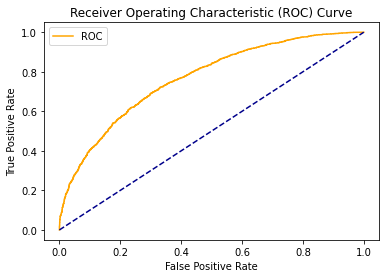

/home/studio-lab-user/.conda/envs/default/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



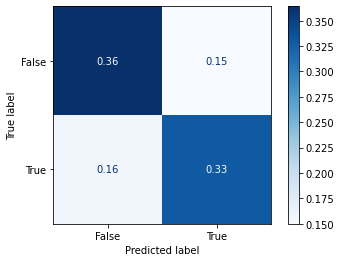

In [73]:
from sklearn.linear_model import LogisticRegression

params_lr = {'penalty': 'l1', 'solver':'liblinear'}

model_lr = LogisticRegression(**params_lr)
model_lr, accuracy_lr, roc_auc_lr, coh_kap_lr, tt_lr = run_model(model_lr, X_train, y_train, X_test, y_test)

Accuracy = 0.6392405063291139
ROC Area under Curve = 0.6380945368268188
Cohen's Kappa = 0.2766662268361626
Time taken = 0.05048370361328125
              precision    recall  f1-score   support

       False    0.64066   0.67898   0.65927      2274
        True    0.63754   0.59721   0.61671      2150

    accuracy                        0.63924      4424
   macro avg    0.63910   0.63809   0.63799      4424
weighted avg    0.63914   0.63924   0.63859      4424



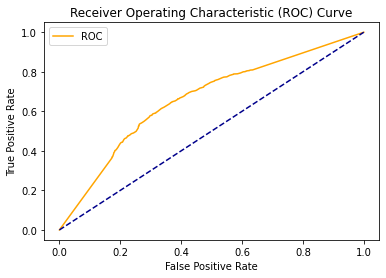

/home/studio-lab-user/.conda/envs/default/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



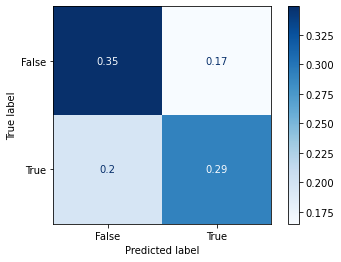

In [74]:
from sklearn.tree import DecisionTreeClassifier

params_dt = {'max_depth': 16,
             'max_features': "sqrt"}

model_dt = DecisionTreeClassifier(**params_dt)
model_dt, accuracy_dt, roc_auc_dt, coh_kap_dt, tt_dt = run_model(model_dt, X_train, y_train, X_test, y_test)

/home/studio-lab-user/.conda/envs/default/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



Accuracy = 0.689873417721519
ROC Area under Curve = 0.6890589270008796
Cohen's Kappa = 0.3785498984339165
Time taken = 43.03813982009888
              precision    recall  f1-score   support

       False    0.69078   0.71812   0.70418      2274
        True    0.68883   0.66000   0.67411      2150

    accuracy                        0.68987      4424
   macro avg    0.68981   0.68906   0.68915      4424
weighted avg    0.68983   0.68987   0.68957      4424



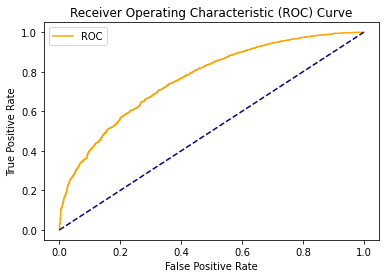

/home/studio-lab-user/.conda/envs/default/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



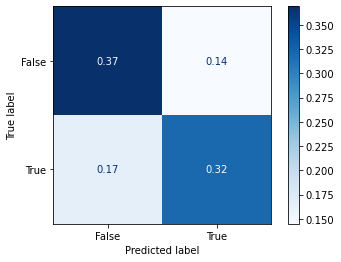

In [75]:
from sklearn.neural_network import MLPClassifier

params_nn = {'hidden_layer_sizes': (30,30,30),
             'activation': 'logistic',
             'solver': 'lbfgs',
             'max_iter': 500}

model_nn = MLPClassifier(**params_nn)
model_nn, accuracy_nn, roc_auc_nn, coh_kap_nn, tt_nn = run_model(model_nn, X_train, y_train, X_test, y_test)

Accuracy = 0.6849005424954792
ROC Area under Curve = 0.684196273342742
Cohen's Kappa = 0.3687292154420514
Time taken = 2.1069862842559814
              precision    recall  f1-score   support

       False    0.68755   0.70932   0.69827      2274
        True    0.68191   0.65907   0.67029      2150

    accuracy                        0.68490      4424
   macro avg    0.68473   0.68420   0.68428      4424
weighted avg    0.68481   0.68490   0.68467      4424



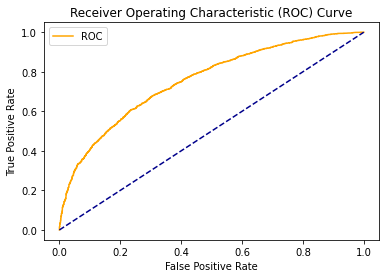

/home/studio-lab-user/.conda/envs/default/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



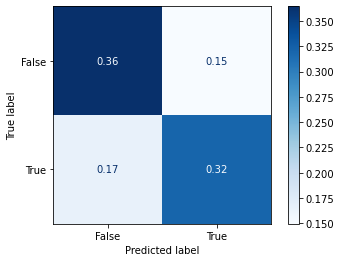

In [76]:
from sklearn.ensemble import RandomForestClassifier

params_rf = {'max_depth': 16,
             'min_samples_leaf': 1,
             'min_samples_split': 2,
             'n_estimators': 100,
             'random_state': 12345}

model_rf = RandomForestClassifier(**params_rf)
model_rf, accuracy_rf, roc_auc_rf, coh_kap_rf, tt_rf = run_model(model_rf, X_train, y_train, X_test, y_test)

In [77]:
#! conda install lightgbm -y

Accuracy = 0.6864828209764918
ROC Area under Curve = 0.6857100488842527
Cohen's Kappa = 0.37181144621755247
Time taken = 0.7189996242523193
              precision    recall  f1-score   support

       False    0.68816   0.71328   0.70050      2274
        True    0.68457   0.65814   0.67109      2150

    accuracy                        0.68648      4424
   macro avg    0.68636   0.68571   0.68579      4424
weighted avg    0.68642   0.68648   0.68621      4424



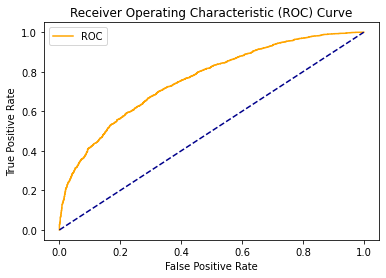

/home/studio-lab-user/.conda/envs/default/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



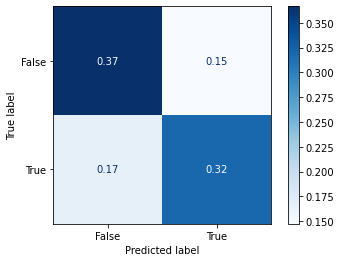

In [78]:
import lightgbm as lgb
params_lgb ={'colsample_bytree': 0.95, 
         'max_depth': 16, 
         'min_split_gain': 0.1, 
         'n_estimators': 200, 
         'num_leaves': 50, 
         'reg_alpha': 1.2, 
         'reg_lambda': 1.2, 
         'subsample': 0.95, 
         'subsample_freq': 20}

model_lgb = lgb.LGBMClassifier(**params_lgb)
model_lgb, accuracy_lgb, roc_auc_lgb, coh_kap_lgb, tt_lgb = run_model(model_lgb, X_train, y_train, X_test, y_test)

Accuracy = 0.6453435804701627
ROC Area under Curve = 0.6449949888527541
Cohen's Kappa = 0.2900304352041908
Time taken = 39.174816608428955
              precision    recall  f1-score   support

       False    0.65427   0.65743   0.65585      2274
        True    0.63581   0.63256   0.63418      2150

    accuracy                        0.64534      4424
   macro avg    0.64504   0.64499   0.64501      4424
weighted avg    0.64530   0.64534   0.64532      4424



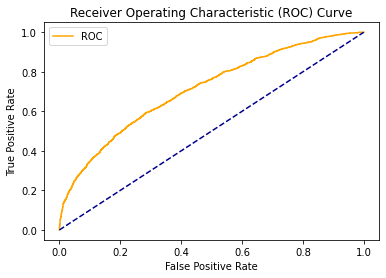

/home/studio-lab-user/.conda/envs/default/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



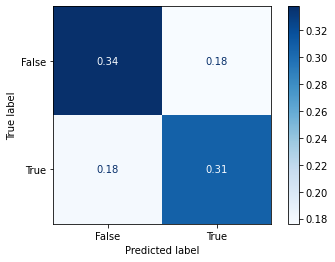

In [79]:
import xgboost as xgb
params_xgb ={'n_estimators': 1000,
            'max_depth': 128}

model_xgb = xgb.XGBClassifier(**params_xgb)
model_xgb, accuracy_xgb, roc_auc_xgb, coh_kap_xgb, tt_xgb = run_model(model_xgb, X_train, y_train, X_test, y_test)

In [80]:
#world_cup_groups_df['country_full'].nunique()

In [81]:
margin = 0.05

# We need the team ranks during the world cup period
world_cup_team_rankings_df = team_rankings_df.loc[(team_rankings_df['rank_date'] == team_rankings_df['rank_date'].max()) & 
                                    team_rankings_df['country_full'].isin(world_cup_groups_df.index.unique())]
world_cup_team_rankings_df = world_cup_team_rankings_df.set_index(['country_full'])
world_cup_team_rankings_df.head()

,rank,country_abrv,total_points,previous_points,rank_change,confederation,rank_date,team,spi
country_full,,,,,,,,,
Brazil,1,BRA,1841.30,1837.56,0,CONMEBOL,2022-10-06,Brazil,94.43
South Korea,28,KOR,1530.30,1526.02,0,AFC,2022-10-06,South Korea,72.64
Tunisia,30,TUN,1507.54,1507.86,0,CAF,2022-10-06,Tunisia,75.36
Costa Rica,31,CRC,1503.59,1500.06,-3,CONCACAF,2022-10-06,Costa Rica,55.46
Australia,38,AUS,1488.72,1483.73,-1,AFC,2022-10-06,Australia,67.09


In [82]:
team_rankings_df.head()

,rank,country_full,country_abrv,total_points,previous_points,rank_change,confederation,rank_date,team,spi
0,1,Germany,GER,57.0,0.0,0,UEFA,1992-12-31,Germany,88.55
1,96,Syria,SYR,11.0,0.0,0,AFC,1992-12-31,Syria,31.34
2,97,Burkina Faso,BFA,11.0,0.0,0,CAF,1992-12-31,Burkina Faso,54.38
3,99,Latvia,LVA,10.0,0.0,0,UEFA,1992-12-31,Latvia,34.31
4,100,Burundi,BDI,10.0,0.0,0,CAF,1992-12-31,Burundi,29.59


In [83]:
world_cup_team_rankings_df.shape

(32, 9)

In [85]:
X_test.columns

Index(['spi_home', 'spi_away', 'average_rank', 'rank_difference',
       'point_difference', 'is_competitive'],
      dtype='object')

In [86]:
from itertools import combinations

opponents = ['First match \nagainst', 'Second match\n against', 'Third match\n against']

world_cup_groups_df['points'] = 0
world_cup_groups_df['total_prob'] = 0

for group in set(world_cup_groups_df['Group']):
    print('************ Matches for group {}:************\n'.format(group))

    for home, away in combinations(world_cup_groups_df.query('Group == "{}"'.format(group)).index, 2):
        print("{} vs. {}: ".format(home, away), end='')
        row = pd.DataFrame(np.array([[np.nan, np.nan, np.nan, np.nan, np.nan, True]]), columns=X_test.columns)
        home_spi = world_cup_team_rankings_df.loc[home, 'spi']
        home_rank = world_cup_team_rankings_df.loc[home, 'rank']
        home_points = world_cup_team_rankings_df.loc[home, 'total_points']
        opp_spi = world_cup_team_rankings_df.loc[away, 'spi']
        opp_rank = world_cup_team_rankings_df.loc[away, 'rank']
        opp_points = world_cup_team_rankings_df.loc[away, 'total_points']
       
        row['spi_home'] = home_spi
        row['spi_away'] = opp_spi
        row['average_rank'] = (home_rank + opp_rank) / 2
        row['rank_difference'] = home_rank - opp_rank
        row['point_difference'] = home_points - opp_points
        
        home_win_prob = model_lr.predict_proba(row)[:,1][0]
        world_cup_groups_df.loc[home, 'total_prob'] += home_win_prob
        world_cup_groups_df.loc[away, 'total_prob'] += 1-home_win_prob
        
        points = 0
        if home_win_prob <= 0.5 - margin:
            print("{} wins with {:.2f}".format(away, 1-home_win_prob))
            world_cup_groups_df.loc[away, 'points'] += 3
        if home_win_prob > 0.5 - margin:
            points = 1
        if home_win_prob >= 0.5 + margin:
            points = 3
            world_cup_groups_df.loc[home, 'points'] += 3
            print("{} wins with {:.2f}".format(home, home_win_prob))
        if points == 1:
            print("Draw")
            world_cup_groups_df.loc[home, 'points'] += 1
            world_cup_groups_df.loc[away, 'points'] += 1
        print()

************ Matches for group H:************

Portugal vs. Ghana: Portugal wins with 0.77

Portugal vs. Uruguay: Draw

Portugal vs. South Korea: Portugal wins with 0.62

Ghana vs. Uruguay: Uruguay wins with 0.80

Ghana vs. South Korea: South Korea wins with 0.72

Uruguay vs. South Korea: Uruguay wins with 0.56

************ Matches for group C:************

Argentina vs. Saudi Arabia: Argentina wins with 0.73

Argentina vs. Mexico: Draw

Argentina vs. Poland: Argentina wins with 0.62

Saudi Arabia vs. Mexico: Mexico wins with 0.75

Saudi Arabia vs. Poland: Poland wins with 0.67

Mexico vs. Poland: Draw

************ Matches for group F:************

Belgium vs. Canada: Belgium wins with 0.63

Belgium vs. Morocco: Draw

Belgium vs. Croatia: Draw

Canada vs. Morocco: Morocco wins with 0.65

Canada vs. Croatia: Croatia wins with 0.69

Morocco vs. Croatia: Croatia wins with 0.61

************ Matches for group A:************

Qatar vs. Ecuador: Ecuador wins with 0.70

Qatar vs. Senegal: S

In [87]:
# Knockout rounds

pairing = [0,3,4,7,8,11,12,15,1,2,5,6,9,10,13,14]

world_cup_groups_df = world_cup_groups_df.sort_values(by=['Group', 'points', 'total_prob'], ascending=False).reset_index()
second_round_df = world_cup_groups_df.groupby('Group').nth([0, 1]) # select the top 2
second_round_df = second_round_df.reset_index()
second_round_df = second_round_df.loc[pairing]
second_round_df = second_round_df.set_index('Team')

finals = ['round of 16', 'Quarterfinal', 'Semifinal', 'Final']

labels = list()
odds = list()

for f in finals:

    print("############ Results for {} ############\n".format(f))
    iterations = int(len(second_round_df) / 2)
    winners = []

    for i in range(iterations):
        home = second_round_df.index[i*2]
        away = second_round_df.index[i*2+1]
        print("{} vs. {}: ".format(home,
                                   away), 
                                   end='')
        row = pd.DataFrame(np.array([[np.nan, np.nan, np.nan, np.nan, np.nan, True]]), columns=X_test.columns)
        home_spi = world_cup_team_rankings_df.loc[home, 'spi']
        home_rank = world_cup_team_rankings_df.loc[home, 'rank']
        home_points = world_cup_team_rankings_df.loc[home, 'total_points']
        
        opp_spi = world_cup_team_rankings_df.loc[away, 'spi']
        opp_rank = world_cup_team_rankings_df.loc[away, 'rank']
        opp_points = world_cup_team_rankings_df.loc[away, 'total_points']
        
        row['spi_home'] = home_spi
        row['spi_away'] = opp_spi
        row['average_rank'] = (home_rank + opp_rank) / 2
        row['rank_difference'] = home_rank - opp_rank
        row['point_difference'] = home_points - opp_points
        
        home_win_prob = model_lr.predict_proba(row)[:,1][0]
        if model_lr.predict_proba(row)[:,1] <= 0.5:
            print("{0} wins with probability {1:.2f}".format(away, 1-home_win_prob))
            winners.append(away)
        else:
            print("{0} wins with probability {1:.2f}".format(home, home_win_prob))
            winners.append(home)

        labels.append("{}({:.2f}) vs. {}({:.2f})".format(world_cup_team_rankings_df.loc[home, 'country_abrv'], 
                                                        1/home_win_prob, 
                                                        world_cup_team_rankings_df.loc[away, 'country_abrv'], 
                                                        1/(1-home_win_prob)))
        odds.append([home_win_prob, 1-home_win_prob])
                
    second_round_df = second_round_df.loc[winners]
    print("\n")

############ Results for round_of_16 ############

Netherlands vs. United States: Netherlands wins with probability 0.54
Argentina vs. Denmark: Denmark wins with probability 0.52
Germany vs. Belgium: Belgium wins with probability 0.56
Brazil vs. Uruguay: Brazil wins with probability 0.56
Senegal vs. England: England wins with probability 0.71
Mexico vs. France: France wins with probability 0.67
Spain vs. Croatia: Spain wins with probability 0.52
Switzerland vs. Portugal: Portugal wins with probability 0.66


############ Results for quarterfinal ############

Netherlands vs. Denmark: Denmark wins with probability 0.53
Belgium vs. Brazil: Brazil wins with probability 0.65
England vs. France: France wins with probability 0.60
Spain vs. Portugal: Portugal wins with probability 0.56


############ Results for semifinal ############

Denmark vs. Brazil: Brazil wins with probability 0.68
France vs. Portugal: Portugal wins with probability 0.57


############ Results for final ############

B

In [ ]:
# df['wc_participant'] = df['home_team'] * df['home_team'].isin(world_cup.index.tolist())
# df['wc_participant'] = df['wc_participant'].replace({'':'Other'})
# df = df.join(pd.get_dummies(df['wc_participant']))

In [ ]:
#spi1.loc[spi1['team'] == 'Ghana']

In [82]:

data1 = {
  "name": ["Sally", "Mary", "John", "charlie"],
  "age": [50, 40, 30, 44]
}

data2 = {
  "name": ["Sally", "Mary", "John"],
  "age": [50, 41, 33]
}

df1 = pd.DataFrame(data1)
df2 = pd.DataFrame(data2)

print(df1.head())
print(df2.head())

      name  age
0    Sally   50
1     Mary   40
2     John   30
3  charlie   44
    name  age
0  Sally   50
1   Mary   41
2   John   33


In [83]:
df3 = pd.merge(df2, df1, how ='outer', on =['name', 'age'])
df3

,name,age
0,Sally,50
1,Mary,41
2,John,33
3,Mary,40
4,John,30
5,charlie,44


In [84]:
df3.drop_duplicates(['name'],keep='first')

,name,age
0,Sally,50
1,Mary,41
2,John,33
5,charlie,44


In [ ]:
# Creating the DataFrame of left side
left = pd.DataFrame({
   
    "time": [pd.Timestamp("2020-03-25 13:30:00.023"),
             pd.Timestamp("2020-03-25 13:30:00.023"),
             pd.Timestamp("2020-03-25 13:30:00.030"),
             pd.Timestamp("2020-03-25 13:30:00.041"),
             pd.Timestamp("2020-03-25 13:30:00.048"),
             pd.Timestamp("2020-03-25 13:30:00.049"),
             pd.Timestamp("2020-03-25 13:30:00.072"),
             pd.Timestamp("2020-03-25 13:30:00.075")
             ],
   
    "ticker": ["GOOG", "MSFT", "MSFT", "MSFT", "GOOG",
               "AAPL", "GOOG", "MSFT"],
   
    "bid": [720.50, 51.95, 51.97, 51.99, 720.50, 97.99,
            720.50, 52.01],
   
    "ask": [720.93, 51.96, 51.98, 52.00, 720.93, 98.01,
            720.88, 52.03]
})

print(left)
 
# Creating the Dataframe of right side
right = pd.DataFrame({
    "time": [
        pd.Timestamp("2020-03-25 13:30:00.023"),
        pd.Timestamp("2020-03-25 13:30:00.038"),
        pd.Timestamp("2020-03-25 13:30:00.048"),
        pd.Timestamp("2020-03-25 13:30:00.048"),
        pd.Timestamp("2020-03-25 13:30:00.048")
    ],
    "ticker": ["MSFT", "MSFT", "GOOG", "GOOG", "AAPL"],
   
    "price": [51.95, 51.95, 720.77, 720.92, 98.0],
   
    "quantity": [75, 155, 100, 100, 100]
})
print(right) 
# Applying merge_asof on data and store it
# in a variable
#merged_dataframe = pd.merge_asof(right, left, on="time",
#                                 by="ticker")
 
# print the variable
#print(merged_dataframe)
aadf = left.merge(right, 
                           left_on=['time', 'ticker'], 
                           right_on=['time', 'ticker'], how='left')
print(aadf)

bbdf = pd.merge_asof(left, right, on="time",
                                 by="ticker")
bbdf